In [2]:
# we are going to use libraries like numpy , Pandas ,Matplotlib, seaborn

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
"""NumPy (Numerical Python)
Used for handling arrays (like lists but faster).
Supports mathematical operations on large datasets.
"""
"""Pandas (Data Analysis Library)
Used for handling and analyzing structured data (tables, CSV, Excel).
Works with DataFrames (like an Excel table).
"""
"""Matplotlib (Basic Data Visualization)
Used for plotting simple graphs.
"""
"""Seaborn (Advanced Data Visualization)
Built on top of Matplotlib for better-looking graphs."""

'Seaborn (Advanced Data Visualization)\nBuilt on top of Matplotlib for better-looking graphs.'

In [5]:
df = pd.read_csv('mymoviedb.csv' , lineterminator = '\n')

In [6]:
df.head() # used to print the head lines , or few lines  from the head section 

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [8]:
df['Genre'].head() #this used to view the data from the specific column of the table 

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [9]:
df.duplicated().sum() # we add .sum() to give the total count

np.int64(0)

In [10]:
# performing basic statistics

In [11]:
df.describe() #only can perform on data which is numeric 

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [12]:
#we dont need to remove columns which are not required , we will remove them

Exploration Summary

we have a dataframe consisting of 9827 rows and 9 columns.
our dataset looks a bit tidy with no NaNs nor duplicated values.
Release Date column needs to be casted into date time and to extract only the year value.
there is noticable outliers in Popularity column.
Vote_average better be categorised for proper analysis.
Genre column has Comma saperated values and white spaces that needs to be handled and casted into category. Exploration Summary

In [13]:
# first as per asked question we will convert the release date into year and date format

In [14]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)
# here we have changes tthe type of data into date format

datetime64[ns]


In [15]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes
# here we have changed the format to year

dtype('int32')

In [16]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [17]:
 cols = ['Overview' , 'Original_Language','Poster_Url']

In [18]:
df.drop(cols, axis =1, inplace = True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [19]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


# categorizing Vote_Average column

We would cut the vote_Average values and make 4 categories: popular average below_avg not_popular to describe it more using catigorize_col() function provided above.

In [20]:
def catigorize_col(df, col, labels):

    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]

    df[col] = pd.cut(df[col], edges , labels = labels, duplicates = 'drop')
    return df

In [21]:
labels = ['not_popular','below_avg', 'average', 'popular']

catigorize_col(df, 'Vote_Average', labels)

df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [22]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [23]:
 df['Vote_Average'].value_counts() #used to get the count

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [24]:
df.dropna(inplace = True) #this function is used to drop the values permenent 

df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [25]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


we will split geners into a list

In [26]:
df['Genre'] = df['Genre'].str.split(', ')

df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [27]:
#casting columns into categories

df['Genre'] = df['Genre'].astype('category')

df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [28]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [29]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

#DATA VISUALIZATION

In [30]:
sns.set_style('whitegrid')

# 1 what is the most frequent genre of movies released on netflix ?

In [31]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

In [32]:
"""sns.catplot(y = 'Genre', data = df, kind = 'count',
            order = df['Genre'].value_counts().index,
            color = '#c30010')
plt.title('Genre column distribution')"""

"sns.catplot(y = 'Genre', data = df, kind = 'count',\n            order = df['Genre'].value_counts().index,\n            color = '#c30010')\nplt.title('Genre column distribution')"

C:\Users\Pranita\AppData\Local\Temp\ipykernel_6804\1050077616.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=genre_counts.index, x=genre_counts.values, palette="Reds_r", order=genre_counts.index)


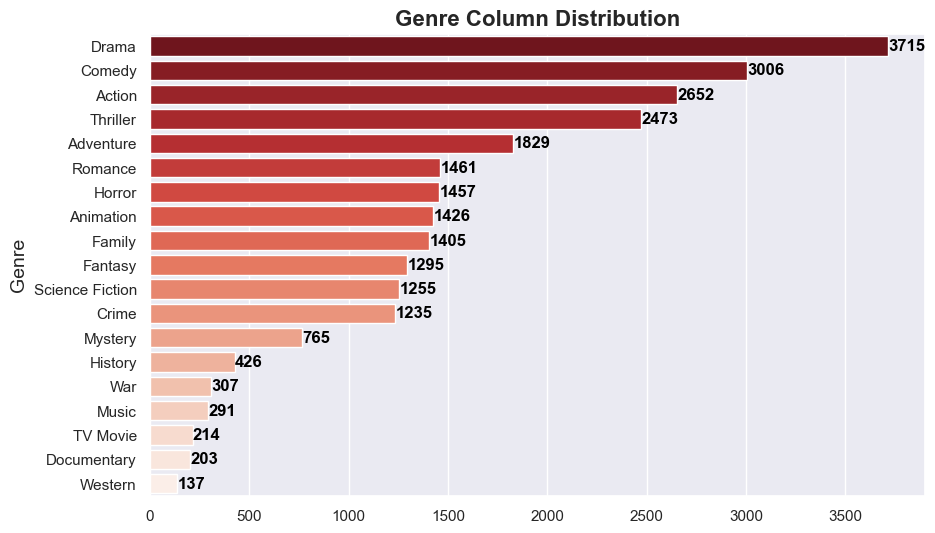

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set theme
sns.set_theme(style="darkgrid")

# Count & sort genres in descending order
genre_counts = df['Genre'].value_counts().sort_values(ascending=False)

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(y=genre_counts.index, x=genre_counts.values, palette="Reds_r", order=genre_counts.index)

# Add value labels
for i, value in enumerate(genre_counts.values):
    ax.text(value + 2, i, str(value), va='center', fontsize=12, fontweight='bold', color='black')

# Improve labels and title
plt.ylabel("Genre", fontsize=14)
plt.title("Genre Column Distribution", fontsize=16, fontweight="bold")

# Show the plot
plt.show()


# 2. which has highest votes in vote avg column?

In [34]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [35]:
"""sns.catplot(y = 'Vote_Average', data = df, kind ='count',
            order = df['Vote_Average'].value_counts().index,
            color = '#c30010')
plt.title('Votes distribution ')
plt.show()"""

"sns.catplot(y = 'Vote_Average', data = df, kind ='count',\n            order = df['Vote_Average'].value_counts().index,\n            color = '#c30010')\nplt.title('Votes distribution ')\nplt.show()"

C:\Users\Pranita\AppData\Local\Temp\ipykernel_6804\573636319.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=vote_counts.index, x=vote_counts.values, palette="Reds_r", order=vote_counts.index)
C:\Users\Pranita\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


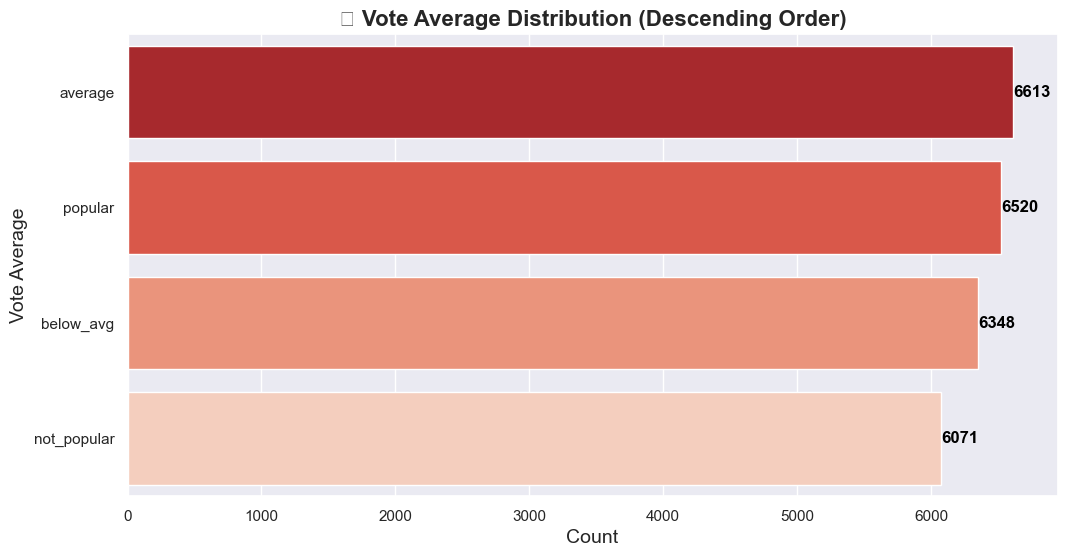

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set theme
sns.set_theme(style="darkgrid")

# Count & sort votes in descending order
vote_counts = df['Vote_Average'].value_counts().sort_values(ascending=False)

# Create the plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(y=vote_counts.index, x=vote_counts.values, palette="Reds_r", order=vote_counts.index)

# Add value labels
for i, value in enumerate(vote_counts.values):
    ax.text(value + 2, i, str(value), va='center', fontsize=12, fontweight='bold', color='black')

# Improve labels and title
plt.xlabel("Count", fontsize=14)
plt.ylabel("Vote Average", fontsize=14)
plt.title("⭐ Vote Average Distribution (Descending Order)", fontsize=16, fontweight="bold")

# Show the plot
plt.show()


# 3. what movie got the heighst popularity ? whats its genre? 

In [37]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure


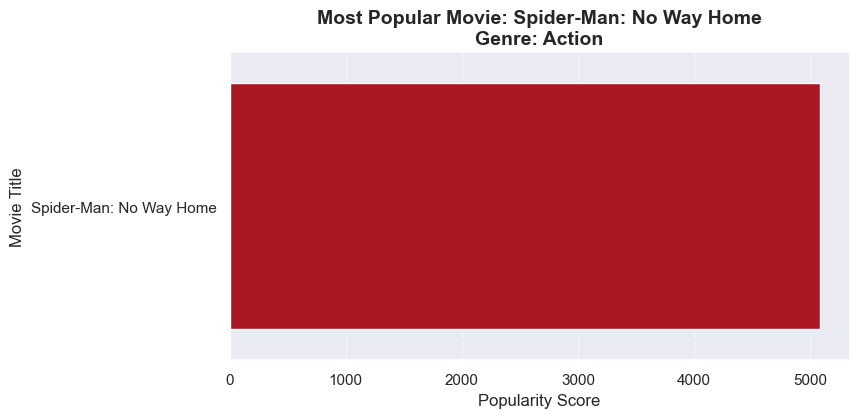

In [38]:
# Find the most popular movie
most_popular_movie = df[df['Popularity'] == df['Popularity'].max()]

# Set figure size
plt.figure(figsize=(8, 4))

# Create a horizontal bar plot
sns.barplot(y=most_popular_movie['Title'], x=most_popular_movie['Popularity'], color="#c30010")

# Labels and title
plt.ylabel("Movie Title", fontsize=12)
plt.xlabel("Popularity Score", fontsize=12)
plt.title(f"Most Popular Movie: {most_popular_movie['Title'].values[0]}\nGenre: {most_popular_movie['Genre'].values[0]}", fontsize=14, fontweight="bold")

# Show grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

In [39]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


# 4.what movie get the lowest popularity? whats its genre ?

In [40]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


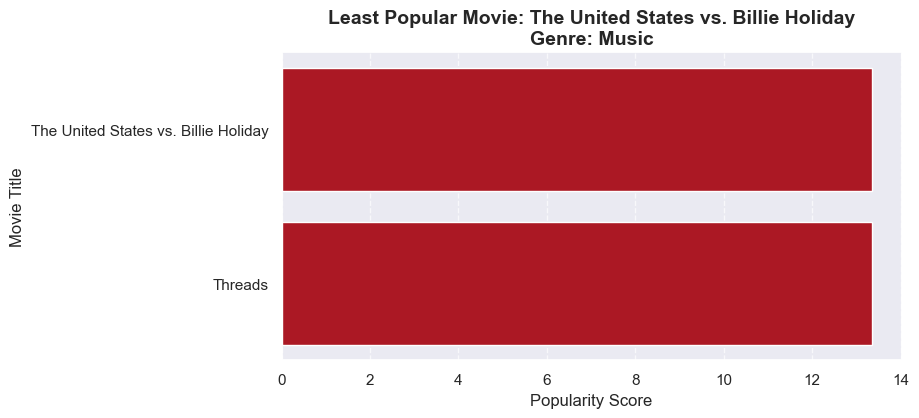

In [41]:
# Find the least popular movie
least_popular_movie = df[df['Popularity'] == df['Popularity'].min()]

# Set figure size
plt.figure(figsize=(8, 4))

# Create a horizontal bar plot
sns.barplot(y=least_popular_movie['Title'], x=least_popular_movie['Popularity'], color="#c30010")

# Labels and title
plt.ylabel("Movie Title", fontsize=12)
plt.xlabel("Popularity Score", fontsize=12)
plt.title(f"Least Popular Movie: {least_popular_movie['Title'].values[0]}\nGenre: {least_popular_movie['Genre'].values[0]}", 
          fontsize=14, fontweight="bold")

# Show grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

# 5. which year has the most filmmed movies ?

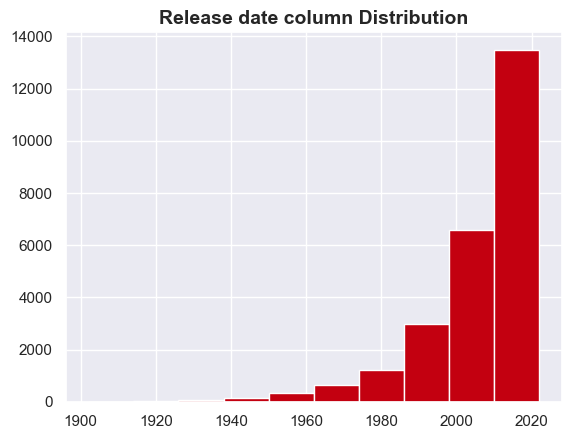

In [42]:
df['Release_Date'].hist(color='#c30010',edgecolor='white')

plt.style.use("dark_background")


plt.title("Release date column Distribution",fontsize=14, fontweight='bold')

plt.show()

# Conclusion
Q1 :  what is the most frequent genre of movies released on netflix ?

   Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the times among 19 other genres.

Q2: What genres has highest votes?

we have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the highest popularity among fans by being having more than 18.5% of movies popularities.

Q3: What movie got the highest popularity? what's its genre?

Spider-Man: No Way Home has the highest popularity rate in our dataset and it has genres of Action, Adventure and Sience Fiction.

Q3: What movie got the lowest popularity? what's its genre?

The united states, thread' has the highest lowest rate in our dataset and it has genres of music, drama, 'war', 'sci-fi' and history.

Q4: Which year has the most filmmed movies?5

year 2020 has the highest filmming rate in our dataset.

In [43]:
from flask import Flask, render_template
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import io
import base64

app = Flask('netfix analysis')

 # Make sure the file exists in your project folder

def plot_to_base64():
    """Generate a base64 string for embedding in HTML."""
    img = io.BytesIO()
    plt.savefig(img, format="png", bbox_inches="tight")
    img.seek(0)
    return base64.b64encode(img.getvalue()).decode()

@app.route("/")
def index():
    return "<h1>Welcome to the Movie Data Dashboard</h1><p><a href='/graphs'>View Graphs</a></p>"

@app.route("/graphs")
def graphs():
    # --- 1. Popularity Distribution ---
    plt.figure(figsize=(8, 4))
    sns.histplot(df["Popularity"], bins=30, color="red")
    plt.title("Movie Popularity Distribution")
    plt.xlabel("Popularity Score")
    plt.ylabel("Count")
    popularity_plot = plot_to_base64()
    plt.close()

    # --- 2. Genre Distribution ---
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df["Genre"], order=df["Genre"].value_counts().index, palette="coolwarm")
    plt.title("Genre Distribution")
    plt.xlabel("Count")
    plt.ylabel("Genre")
    genre_plot = plot_to_base64()
    plt.close()

    # --- 3. Most Popular Movie ---
    most_popular = df[df["Popularity"] == df["Popularity"].max()]
    plt.figure(figsize=(8, 4))
    sns.barplot(x=most_popular["Popularity"], y=most_popular["Title"], color="green")
    plt.title(f"Most Popular Movie: {most_popular['Title'].values[0]}")
    most_popular_plot = plot_to_base64()
    plt.close()

    return render_template("graphs.html", 
                           popularity_plot=popularity_plot, 
                           genre_plot=genre_plot, 
                           most_popular_plot=most_popular_plot)

if ('netfix analysis') == "__main__":
    app.run(debug=True)


In [44]:
!pip install flask


In [45]:
# Create the "templates" folder if it doesn't exist
import os
if not os.path.exists("templates"):
    os.makedirs("templates")

# Create and write to graphs.html
with open("templates/graphs.html", "w") as file:
    file.write("""
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Graphs Page</title>
        <style>
            body { font-family: Arial, sans-serif; text-align: center; }
            img { width: 80%; max-width: 600px; margin: 10px; border: 2px solid #ccc; border-radius: 10px; }
        </style>
    </head>
    <body>
        <h1>Movie Analysis Graphs</h1>
        <img src="{{ url_for('static', filename='popularity.png') }}" alt="Popularity Graph">
        <img src="{{ url_for('static', filename='genre.png') }}" alt="Genre Distribution">
        <img src="{{ url_for('static', filename='most_popular.png') }}" alt="Most Popular Movie">
    </body>
    </html>
    """)  # Add basic HTML content
print("templates/graphs.html created successfully!")


templates/graphs.html created successfully!


In [46]:
num_records = df.shape[0]  # Number of rows
num_columns = df.shape[1]  # Number of columns

print(f"Number of Records: {num_records}")
print(f"Number of Columns: {num_columns}")


Number of Records: 25552
Number of Columns: 6


In [47]:
null_values = df.isnull().sum()  # Count of missing values per column
total_nulls = df.isnull().sum().sum()  # Total missing values

print("Null Values in Each Column:\n", null_values)
print(f"Total Null Values in Dataset: {total_nulls}")

Null Values in Each Column:
 Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64
Total Null Values in Dataset: 0


In [48]:
# Define thresholds for categories
df["Popularity_Category"] = pd.cut(df["Popularity"], 
                                   bins=[df["Popularity"].min(), 20, 50, df["Popularity"].max()], 
                                   labels=["Low", "Medium", "High"])

# Display category counts
print(df["Popularity_Category"].value_counts())


Popularity_Category
Low       11159
Medium    10169
High       4218
Name: count, dtype: int64
